In [1]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

In [2]:
# Step 1: Generate Data
np.random.seed(12)
X = np.random.randn(80, 100)
beta = np.zeros(100)
beta[:10] = 2
beta = beta.reshape(-1, 1)
epsilon = np.random.randn(80, 1)
Y = np.dot(X, beta) + epsilon

In [3]:
# Step 2: Define alphas and Initialize variables
alphas = np.logspace(-3, 1, 50)
n, p = X.shape
aic_scores = []
bic_scores = []

In [4]:
# Step 3: Train Lasso for each alpha and compute AIC/BIC
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
    lasso.fit(X, Y.ravel())
    y_pred = lasso.predict(X)
    rss = np.sum((Y.ravel() - y_pred) ** 2)
    k = np.sum(lasso.coef_ != 0)  # Number of non-zero coefficients

    # AIC and BIC
    aic = n * np.log(rss / n) + 2 * k
    bic = n * np.log(rss / n) + k * np.log(n)

    aic_scores.append(aic)
    bic_scores.append(bic)

In [5]:
# Step 4: Find optimal alpha based on AIC and BIC
optimal_alpha_aic = alphas[np.argmin(aic_scores)]
optimal_alpha_bic = alphas[np.argmin(bic_scores)]

In [6]:
print(f"Optimal alpha (AIC): {optimal_alpha_aic}")
print(f"Optimal alpha (BIC): {optimal_alpha_bic}")

Optimal alpha (AIC): 0.001
Optimal alpha (BIC): 0.001


In [7]:
# Step 5: Compare with CV method
lasso_cv = LassoCV(alphas=alphas, cv=5, fit_intercept=False)
lasso_cv.fit(X, Y.ravel())
optimal_alpha_cv = lasso_cv.alpha_

In [8]:
print(f"Optimal alpha (CV): {optimal_alpha_cv}")

Optimal alpha (CV): 0.07543120063354615


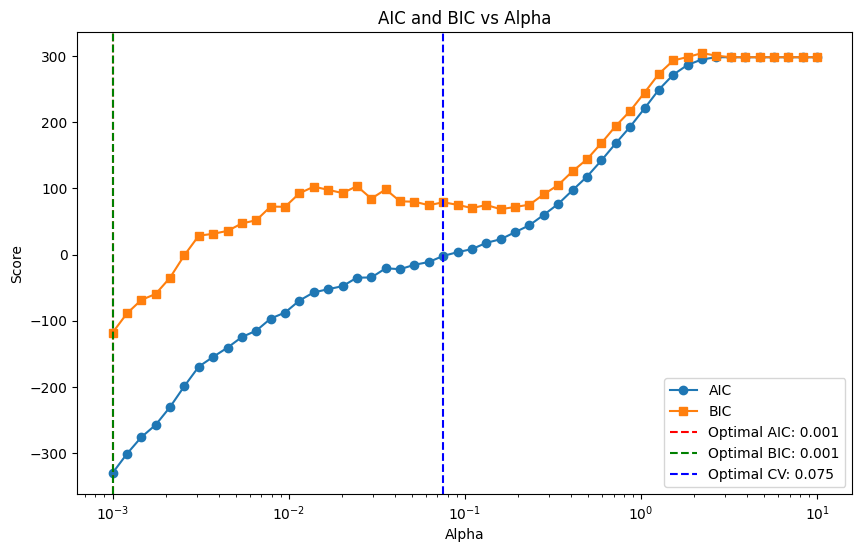

In [9]:
# Step 6: Plot AIC/BIC vs alphas
plt.figure(figsize=(10, 6))
plt.plot(alphas, aic_scores, label='AIC', marker='o')
plt.plot(alphas, bic_scores, label='BIC', marker='s')
plt.axvline(optimal_alpha_aic, color='r', linestyle='--', label=f'Optimal AIC: {optimal_alpha_aic:.3f}')
plt.axvline(optimal_alpha_bic, color='g', linestyle='--', label=f'Optimal BIC: {optimal_alpha_bic:.3f}')
plt.axvline(optimal_alpha_cv, color='b', linestyle='--', label=f'Optimal CV: {optimal_alpha_cv:.3f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('AIC and BIC vs Alpha')
plt.legend()
plt.show()